# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [2]:
dataset = pd.read_csv('Titanic.csv')

In [3]:
dataset.head()
# The influential factors could be : Sex- Pclas- Child- Mother

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [4]:
dataset = pd.read_csv('titanic_simplified.csv')

In [5]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“What sorts of passengers were more likely to survive?”**  

**_Note:_ Your graphs should formatted so they are easily readable. It is expected that you provide a title and axis labels, as well as a legend when necessary.** 

## Part 1: General information 
Using Pandas tools, display the following pieces of information:

### a) What is the number of passengers?

In [6]:
#Count the rows
print(dataset.dropna().shape[0])

891


### b) What is the mean age of the passengers?

In [7]:
#Agg function:
print(dataset['Age'].agg(np.mean))

29.789191919191918


/var/folders/dl/y6c96df54f7byh59bmz0bpv00000gn/T/ipykernel_6512/983856977.py:2: FutureWarning: The provided callable <function mean at 0x10523c680> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(dataset['Age'].agg(np.mean))


### c) How many passengers are above 70 years old?

In [8]:
#Filter:
print(dataset[dataset['Age']>70].shape[0])

8


### d) What proportion of passengers are in each class? (1st, 2nd, 3rd)

In [9]:
# Get the proportion of Pclass of each type
prop_class_counts =  dataset["Pclass"].value_counts(normalize=True)
print(prop_class_counts)



Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


## Part 2: Your first data exploration
Using, Matplotlib, make plots that display the required information

### a) Show the relationship between fare paid by the passengers and their age 
You suspect that in general, older passengers might have paid more for their tickets than the young passengers. To verify this, plot all the data points to see if there is a trend.  
Additional instructions:
- Which type of plot is the most appropriate for this? A normal (line) plot, or scatter plot? I let you try and decide. 😄
- Don't forget to add a title and axis labels to your graph.

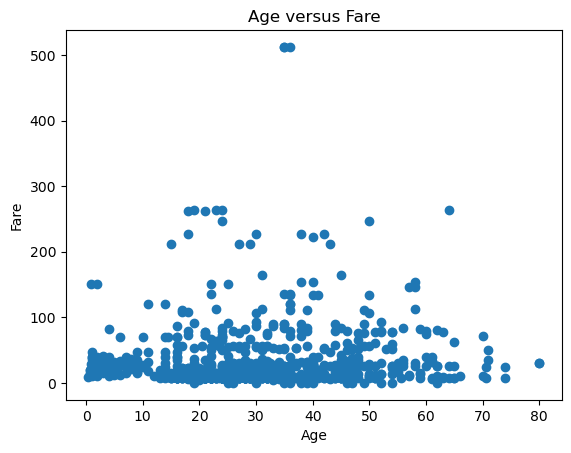

[[1.        0.0933353]
 [0.0933353 1.       ]]


In [10]:
### I would like to see the whether such correlation exists or not therefore, I prefer scatter plot for visualization.
plt.scatter(dataset['Age'], dataset['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age versus Fare')
plt.show()

print(np.corrcoef(dataset['Age'], dataset['Fare']))






📝 TEXT ANSWER: In the cell below, write down what you conclude from the graph.  
Note: you can turn this cell into a text cell by clicking on it and pressing "esc + m", and then you can start your text with the ">" symbol to make it look nice.

The scatter plot reveals a weak correlation between passenger age and fares paid, supported by a correlation coefficient of 0.09, indicating a minimal linear relationship. Additional analysis is required to validate this observation further.

### b) Show the age distributions of the passengers depending on the port of embarkment
Your friend told you that Queenstwon is full of retired people and you suspect that passengers who left from there are older that those who left from the two other ports. Find out by making a graph that allows you to compare the age distributions between the three ports.  
Additional instructions:
- Use a density plot.
- Your figure should have three curves, one for each port: Cherbourg, Queenstown, Southampton.
- Display the three curves on the same figure for easy comparison.
- If you make your plot carefully, your legend should indicate the name of the port that corresponds to each curve.
- Don't forget to add a title and axis labels to your graph.

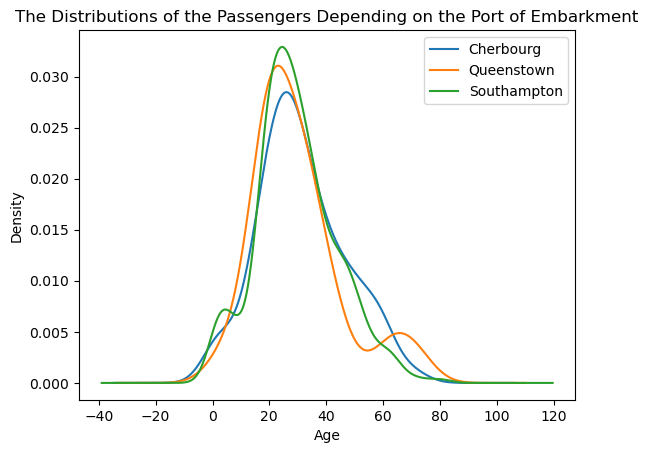

In [11]:


# Define the port_list as a dictionary
port_list = {0: 'Cherbourg', 1: 'Queenstown', 2: 'Southampton'}

# Plot each port separately with a different color
for variety, labels in port_list.items():
    subset = dataset.loc[dataset['Embarked'] == variety, ['Age']]
    subset['Age'].plot(kind='density', label=labels)

plt.title('The Distributions of the Passengers Depending on the Port of Embarkment')
plt.xlabel('Age')
plt.legend()
plt.show()



📝 TEXT ANSWER: In the cell below, write down what you conclude from the graph.

The plot illustrates the age distributions of passengers depending on the port of embarkation. Each port is represented by a distinct color, allowing for a visual comparison of age demographics. The density plot provides insights into the concentration and spread of ages within each embarkation point, contributing to a better understanding of age-related patterns across different ports.

Here, the overlapping distributions suggest a consistent peak age of around 40 years for passengers at each port. Moreover, the proportions of passengers appear nearly similar across all ports, indicating a balanced representation regardless of the specific embarkation point. Ofcourse, we could do further analysis to check whether the proportions differs significantly. - Anova 

## Part 3:  Data Exploration related with survival
Now, let's perform analyses that will help you get intutions about the factors that might have influenced survival.

### a) How is age linked to survival?
You want to know if the age of a passenger gives you any information about their probability of surviving. Make a plot that helps you find this out.

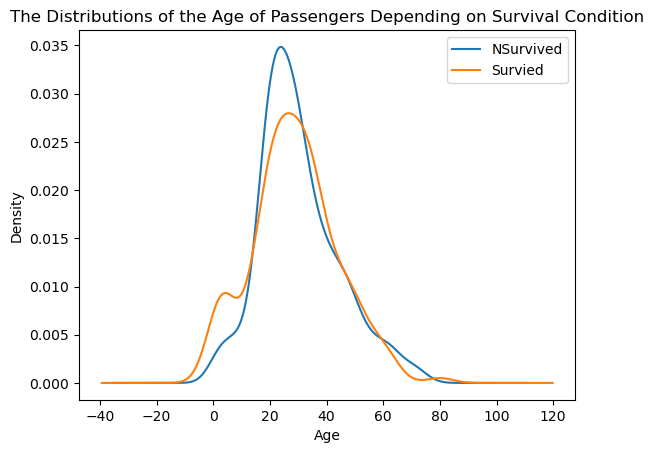

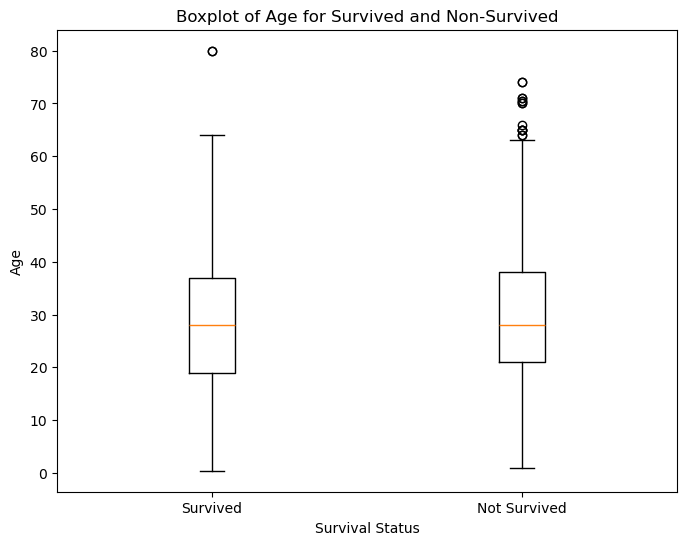

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.356102  13.982140  1.00  21.0  28.0  38.0  74.0
1         342.0  28.879152  14.983898  0.42  19.0  28.0  37.0  80.0


In [12]:
#### ## ## ## ## ## ## ## ## ## ##  Plotting 1 #### ## ## ## ## ## ## ## ## ## ##  

# Define the port_list as a dictionary
survived_list = {0: 'NSurvived', 1: 'Survied'}
# Plot each port separately with a different color
for variety, labels in survived_list.items():
    subset = dataset.loc[dataset['Survived'] == variety, ['Age']]
    subset['Age'].plot(kind='density', label=labels)

plt.title('The Distributions of the Age of Passengers Depending on Survival Condition')
plt.xlabel('Age')
plt.legend()
plt.show()



#### ## ## ## ## ## ## ## ## ## ##  Plotting 2 #### ## ## ## ## ## ## ## ## ## ##  - Better for seeing dispersion-quartiles etc.
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([dataset.loc[dataset['Survived'] == 1, 'Age'].dropna(), 
             dataset.loc[dataset['Survived'] == 0, 'Age'].dropna()],
            labels=['Survived', 'Not Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Boxplot of Age for Survived and Non-Survived')
plt.show()

# Create a pivot table to show the the all descriptive stats-  Age for each Survived category
survive_by_age = dataset.groupby('Survived')['Age'].describe()
print(survive_by_age)





📝 TEXT ANSWER: In the cell below, write down what you conclude from your graph.

Plot 1: Displays density distributions of passenger ages based on survival conditions using distinct colors for survived and non-survived groups.

Plot 2: A boxplot offers a detailed view of age distribution statistics, illustrating quartiles, median, and potential outliers for both survival categories. Note: Dispersion can be observed through the width of density curves.

Survivor and non-survivor age distributions show a mean difference of around 2 years with identical medians. While average ages seem similar, statistical methods like a t-test are needed for confirmation. Deviation in age is comparable, but unequal sample sizes may impact drawing definitive conclusions. 

### b) Were men or women more likely to die?  
Find an answer to this question in any way you like.

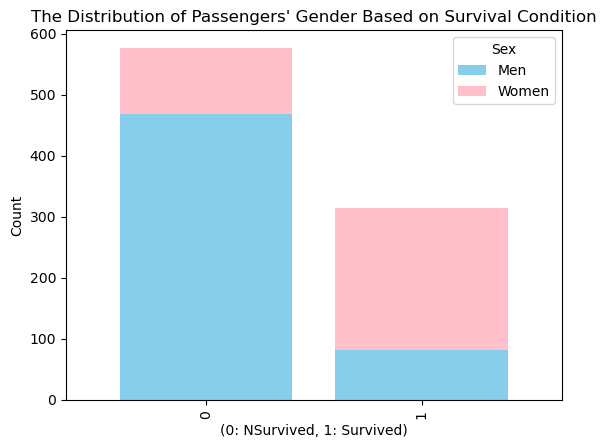


Proportion Result: Survival Proportion for Each Gender
Survived         0         1
Sex                         
0         0.811092  0.188908
1         0.257962  0.742038

Proportions of Men and Women for Each Survival Category:
Survived         0         1
Sex                         
0         0.852459  0.318713
1         0.147541  0.681287


In [13]:
df_plot = dataset.groupby(['Sex', 'Survived']).size().unstack().plot(
    kind='bar', stacked=True, color=['skyblue', 'pink'], width=0.8
)
# Set plot title and labels
plt.title('The Distribution of Passengers\' Gender Based on Survival Condition')
plt.xlabel('(0: NSurvived, 1: Survived)')
plt.ylabel('Count')
plt.legend(['Men', 'Women'], title='Sex')
plt.show()

# Proportion Calculations -- Gender proportions within each survival category.
pivot_table_result = dataset.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)
# Calculate the proportion of each row by dividing by the total count
proportion_result_gender = pivot_table_result.div(pivot_table_result.sum(axis=1), axis=0)
# Calculate the proportion of each column by dividing by the total count
proportion_result_survival= pivot_table_result.div(pivot_table_result.sum(axis=0), axis=1)
# Display the resulting proportion table
print("\nProportion Result: Survival Proportion for Each Gender")
print(proportion_result_gender)
print("\nProportions of Men and Women for Each Survival Category:")
print(proportion_result_survival)



📝 TEXT ANSWER: In the cell below, interpret your plot or your statistics and answer the question with the information you displayed.

The stacked bar plot shows survival counts by gender. Pink bars represent females, and sky blue bars represent males. Heights indicate individual counts, revealing a  gender-specific difference in survival outcomes. Here, women are more likely not to survive, while men are more likely to survive.

a) pivot_table_result.sum(axis=1) calculates the total count for each gender (Men and Women) within each survival category (Survived and Not Survived). The resulting proportion table shows the percentage of Men and Women within each survival category.


b) pivot_table_result.sum(axis=0) calculates the total count for each survival category (Survived and Not Survived) within each gender (Men and Women). The resulting proportion table shows the percentage of survival within each gender category.


COMPLETE!!!

These proportions highlight a significant contrast in survival outcomes between genders, indicating a notable difference in survival outcomes based on gender, with a higher proportion of females surviving compared to females.


### c) Did passengers of first, second and third class have different survival rates?  
Make a plot that allows you to compare at first glance the survival rates between the different classes.

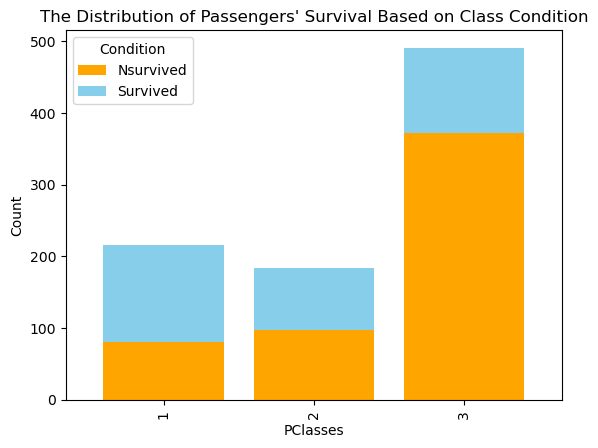


Proportion Result: Survival Proportion for Each Class
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

Proportions of Classes for Each Survival Category:
Survived         0         1
Pclass                      
1         0.145719  0.397661
2         0.176685  0.254386
3         0.677596  0.347953


In [14]:
import matplotlib.pyplot as plt

# Stacked Bar Plot
df_plot = dataset.groupby(['Pclass', 'Survived']).size().unstack().plot(
    kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8
)


plt.title('The Distribution of Passengers\' Survival Based on Class Condition')
plt.xlabel('PClasses')
plt.ylabel('Count')
plt.legend(['Nsurvived', 'Survived'], title='Condition')
plt.show()

# Proportion Calculations -- Survival proportions within each class category.
pivot_table_result = dataset.dropna().pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)
cumulative_result = pivot_table_result.cumsum()
# Calculate the proportion of each row
proportion_result_class = pivot_table_result.div(pivot_table_result.sum(axis=1), axis=0)
# Calculate the proportion of each column
proportion_result_survival= pivot_table_result.div(pivot_table_result.sum(axis=0), axis=1)
# Display the resulting proportion table
print("\nProportion Result: Survival Proportion for Each Class")
print(proportion_result_class)
print("\nProportions of Classes for Each Survival Category:")
print(proportion_result_survival)





📝 TEXT ANSWER: In the cell below, describe what your graph tells you about the difference between the passenger classes in terms of survival rate.

Pclass 1: Approximately 63% of passengers in the first class survived, while 37% did not.
Pclass 2: About 56% of passengers in the second class survived, with 44% not surviving.
Pclass 3: In the third class, around 38% of passengers survived, while 62% did not.

You can see also second proportion analysis.

Overall, the observed trends indicate that passenger class significantly influenced survival proportions. In simpler terms, a higher passenger class corresponded to an increased probability of survival.

## Interpretation
If you saw the movie _Titanic_, you probably remember that when they board the lifeboats, they say "Children and women first!". Does the data seem to confirm that they prioritized the boarding this way? What is the evidence?  
📝 TEXT ANSWER: Write your answer in the cell below

I previously addressed this question through a proportion analysis, and it appears that the initial assumptions may  hold based on the data.

In [15]:
# Proportion Calculations -- Mindset check based on socio-economic conditions.
subset=dataset[dataset['Pclass' ]== 1]
pivot_table_result = subset.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)
# Calculate the proportion of each row by dividing by the total count
proportion_result_gender = pivot_table_result.div(pivot_table_result.sum(axis=1), axis=0)
# Calculate the proportion of each column by dividing by the total count
proportion_result_survival= pivot_table_result.div(pivot_table_result.sum(axis=0), axis=1)
# Display the resulting proportion table
print("\nProportion Result: Survival Proportion for Each Gender")
print(proportion_result_gender)
print("\nProportions of Men and Women for Each Survival Category:")
print(proportion_result_survival)



Proportion Result: Survival Proportion for Each Gender
Survived         0         1
Sex                         
0         0.631148  0.368852
1         0.031915  0.968085

Proportions of Men and Women for Each Survival Category:
Survived       0         1
Sex                       
0         0.9625  0.330882
1         0.0375  0.669118
